In [77]:
from io import StringIO
import matplotlib.pyplot as plt

def prediction(dt):   
    df = pd.DataFrame.from_dict(dt)
    print(df.info())
    df.plot(figsize=(20, 6), fontsize=15)
    plt.xlabel("Date")
    plt.ylabel("deaths");
    
    return result
# вернуть данные - результат прогноза    

In [ ]:
from flask import Flask, request, jsonify
import pandas as pd

app = Flask(__name__)

@app.route('/')
def home():
    return 'Welcome to our service!'
    
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    #df = pd.DataFrame(data)    
    #response = {'status': 'success', 'data': df.to_dict(orient='records')}
    #df.to_csv('data.csv')    
    #return hello(data= df.to_json(orient='records'))
    return prediction(data)

    
if __name__ == '__main__':
    app.run(port=8080, debug=False)



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8080
Press CTRL+C to quit
127.0.0.1 - - [02/Sep/2024 13:26:36] "POST /predict HTTP/1.1" 200 -


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dt      72 non-null     object
 1   death   72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB
None


In [ ]:
# тренировка по данным из kaggle 

In [134]:


#import scipy
# Import datasets, classifiers and performance metrics
#from sklearn import datasets, svm, metrics
#from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.neural_network import MLPClassifier

АНАЛИЗ ВРЕМЕННЫХ РЯДОВ

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
df = pd.read_csv('./moscow_stats.csv')
df.tail()


,ID,Year,Month,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalPopulationThisYear
119,120,2019,December,10329,5333,4996,10562,6230,4350,1250,63,935,12615279
120,121,2020,January,9703,5014,4689,10918,3365,4134,1088,46,815,12678079
121,122,2020,February,9485,4777,4708,9873,6244,3290,1082,50,942,12678079
122,123,2020,March,9533,4940,4593,10250,4250,3284,1003,40,771,12678079
123,124,2020,April,3959,2042,1917,11846,3893,1424,323,7,54,12678079


In [34]:
# перевожу в числа названия месяцев (это для обучения нейронки)
pd.set_option('future.no_silent_downcasting', True)
df['Month'] = df['Month'].replace({
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July':7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
})



In [4]:
df

,ID,Year,Month,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalPopulationThisYear
0,1,2010,1,9206,4785,4421,10430,4997,3302,1241,95,491,11503501
1,2,2010,2,9060,4656,4404,9573,4873,2937,1326,97,639,11503501
2,3,2010,3,10934,5630,5304,10528,3642,4361,1644,147,717,11503501
3,4,2010,4,10140,5278,4862,9501,9698,3943,1530,128,642,11503501
4,5,2010,5,9457,4825,4632,9482,3726,3554,1397,96,492,11503501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,120,2019,12,10329,5333,4996,10562,6230,4350,1250,63,935,12615279
120,121,2020,1,9703,5014,4689,10918,3365,4134,1088,46,815,12678079
121,122,2020,2,9485,4777,4708,9873,6244,3290,1082,50,942,12678079
122,123,2020,3,9533,4940,4593,10250,4250,3284,1003,40,771,12678079


In [35]:
# Конвертируем столбцы 'Year' и 'Month' в datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1), format='%Y %m %d')

In [36]:
df.head()

,ID,Year,Month,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalPopulationThisYear,Date
0,1,2010,1,9206,4785,4421,10430,4997,3302,1241,95,491,11503501,2010-01-01
1,2,2010,2,9060,4656,4404,9573,4873,2937,1326,97,639,11503501,2010-02-01
2,3,2010,3,10934,5630,5304,10528,3642,4361,1644,147,717,11503501,2010-03-01
3,4,2010,4,10140,5278,4862,9501,9698,3943,1530,128,642,11503501,2010-04-01
4,5,2010,5,9457,4825,4632,9482,3726,3554,1397,96,492,11503501,2010-05-01


In [45]:

#X = df[['Year','Month']]
#Y = df['TotalPopulationThisYear']

In [37]:
sub_df = df[['Date','StateRegistrationOfDeath']]
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      124 non-null    datetime64[ns]
 1   StateRegistrationOfDeath  124 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 KB
None


In [67]:
# строим график

In [39]:
sub_df.isna().sum() 

Date                        0
StateRegistrationOfDeath    0
dtype: int64

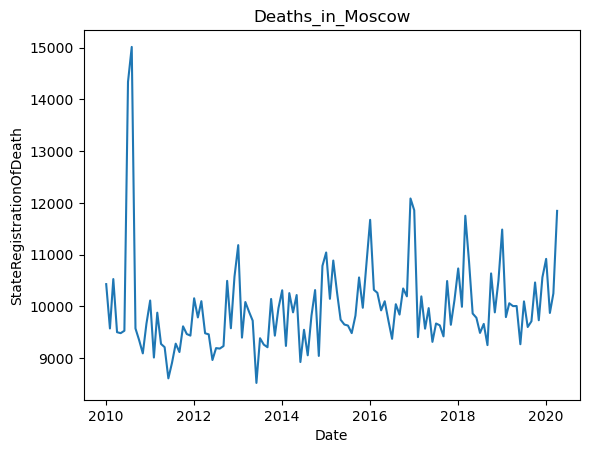

In [40]:
plt.plot(sub_df['Date'], sub_df['StateRegistrationOfDeath'])
plt.title('Deaths_in_Moscow')
plt.xlabel('Date')
plt.ylabel('StateRegistrationOfDeath')
plt.show()

In [9]:
# Проведем тест Дики-Фуллера на стационарность
result = adfuller(sub_df['StateRegistrationOfDeath'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.015848
p-value: 0.279668
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581


**ADF Statistic: -0.983253**
Это значение статистики теста Дики-Фуллера.
Чем ближе абсолютное значение этой статистики к нулю, тем сильнее доказана стационарность временного ряда.
В данном случае, значение статистики близко к нулю, что указывает на высокую вероятность того, что временной 
ряд является стационарным.

**p-value: 0.759323**
p-значение — это вероятность ошибки первого рода (α), то есть вероятность отвергнуть нулевую гипотезу о стационарности, когда на самом деле нулевая гипотеза верна. В данном случае, p-значение равно 0.7593, что значительно выше стандартного уровня значимости 0.05. Это означает, что мы не можем отвергнуть нулевую гипотезу о стационарности временного ряда на основе текущих данных, так как p-значение больше 0.05.

**Critical Values:
1%: -3.491
5%: -2.888
10%: -2.581**
Эти критические значения используются для определения порога, ниже которого статистика теста Дики-Фуллера указывает на стационарность временного ряда. Критическое значение зависит от выбранного уровня значимости (обычно 1%, 5% или 10%). В данном случае, абсолютное значение статистики (-0.983253) меньше всех трех критических значений, что подтверждает стационарность временного ряда.

In [9]:
#sub_df[sub_df['StateRegistrationOfDeath'] > 12086]


,Date,StateRegistrationOfDeath
6,2010-07-01,14340
7,2010-08-01,15016


In [10]:
#sub_df.loc[sub_df['StateRegistrationOfDeath'] > 12086, 'StateRegistrationOfDeath'] = np.nan

In [11]:
#sub_df[sub_df['StateRegistrationOfDeath'] > 12086]

,Date,StateRegistrationOfDeath


In [10]:
sub_df.interpolate(inplace=True)

/var/folders/y5/24l_kybn3bdgl94q31jdb_1h0000gp/T/ipykernel_10871/2871395644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.interpolate(inplace=True)


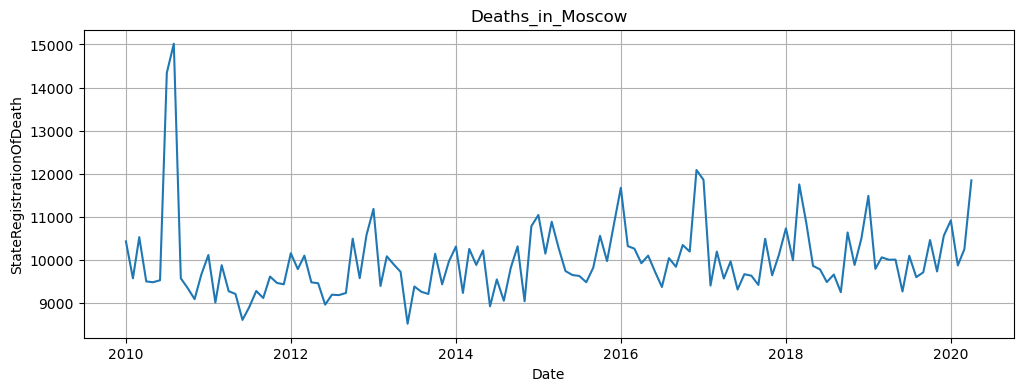

In [12]:


# Построим график временного ряда 
plt.figure(figsize=(12, 4))
plt.plot(sub_df['Date'], sub_df['StateRegistrationOfDeath'])
plt.title('Deaths_in_Moscow')
plt.xlabel('Date')
plt.ylabel('StateRegistrationOfDeath')
plt.grid(True)
plt.show()



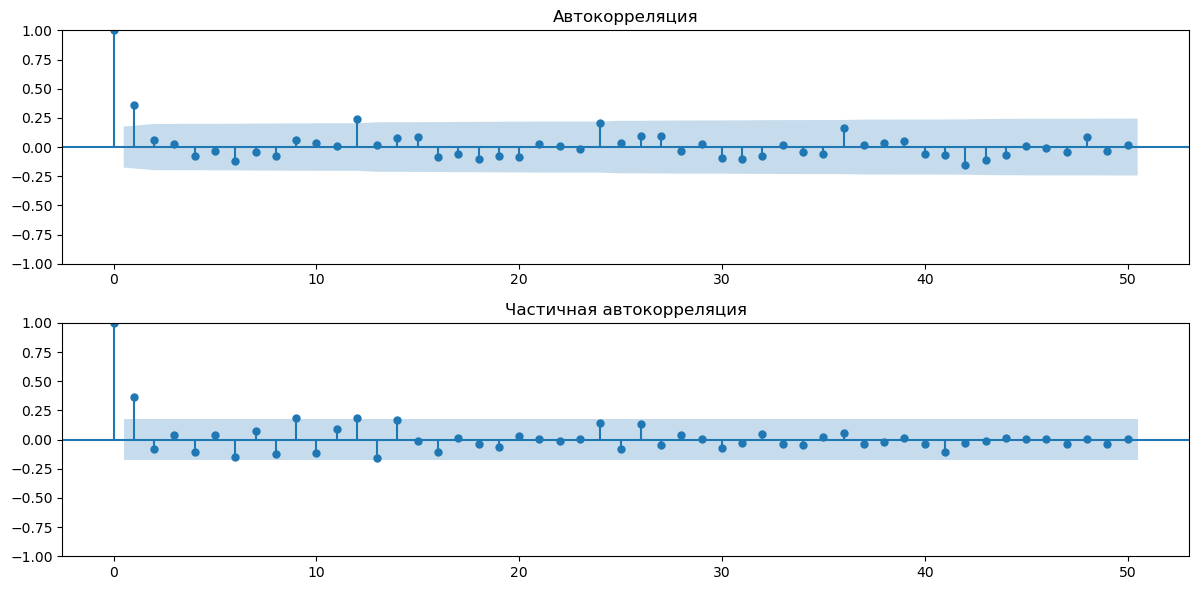

In [12]:
# Рассчитываем автокорреляцию и частичную автокорреляцию
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sub_df['StateRegistrationOfDeath'], lags=50, ax=plt.gca())
plt.title('Автокорреляция')

plt.subplot(212)
plot_pacf(sub_df['StateRegistrationOfDeath'], lags=50, ax=plt.gca())
plt.title('Частичная автокорреляция')

plt.tight_layout()
plt.show()


Выбор и обучение модели

In [13]:
model = ARIMA(sub_df['StateRegistrationOfDeath'], order=(1, 1, 1))
model_fit = model.fit()

**p=1** означает, что модель использует предыдущее значение временного ряда для прогнозирования текущего значения.
**d=1** указывает на интегрирование данных один раз, чтобы сделать их стационарными.
**q=1** говорит о том, что модель учитывает предыдущее значение ошибки прогнозирования для уточнения прогноза текущего значения.

In [14]:
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     StateRegistrationOfDeath   No. Observations:                  124
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -1007.332
Date:                      Mon, 02 Sep 2024   AIC                           2020.663
Time:                              13:14:01   BIC                           2029.100
Sample:                                   0   HQIC                          2024.090
                                      - 124                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4199      0.040     10.381      0.000       0.341       0.499
ma.L1         -0.9757      0.040    -24.257      0.000      -1.055      -0.897
sigm

In [15]:

# Прогноз на основе обученной модели
forecast = model_fit.forecast(steps=12)

# Рассчитываем MSE и MAE
mse = mean_squared_error(sub_df['StateRegistrationOfDeath'][-12:], forecast)
mae = mean_absolute_error(sub_df['StateRegistrationOfDeath'][-12:], forecast)

print(f'MSE: {mse}')


MSE: 560554.0532361801


In [16]:
sub_df


,Date,StateRegistrationOfDeath
0,2010-01-01,10430
1,2010-02-01,9573
2,2010-03-01,10528
3,2010-04-01,9501
4,2010-05-01,9482
...,...,...
119,2019-12-01,10562
120,2020-01-01,10918
121,2020-02-01,9873
122,2020-03-01,10250


In [17]:

sub_df.shape

(124, 2)

/var/folders/y5/24l_kybn3bdgl94q31jdb_1h0000gp/T/ipykernel_10871/2605681041.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start='2020-06-01', periods=12, freq='Y')


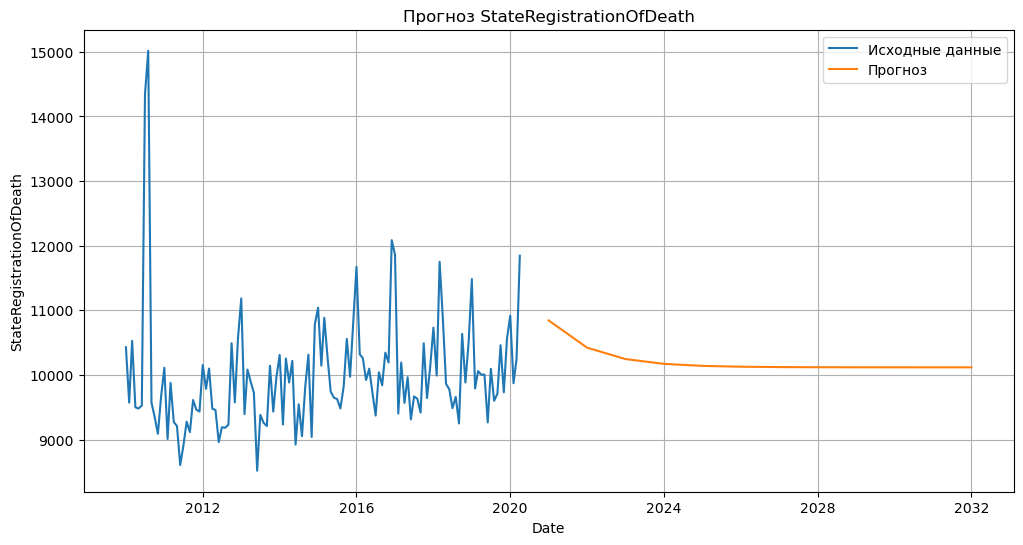

In [18]:
# Прогноз на будущее (следующие 12 месяцев)
forecast_future = model_fit.forecast(steps=12)

# Создаем новый DataFrame для будущих значений
future_dates = pd.date_range(start='2020-06-01', periods=12, freq='Y')
forecast_df = pd.DataFrame({'Date': future_dates, 'Прогноз StateRegistrationOfDeath': forecast_future})
#forecast_df = pd.DataFrame({'Date': future_dates, 'StateRegistrationOfDeath': forecast_future})
# Присоединяем прогноз к исходному DataFrame

sub_df = pd.concat([sub_df, forecast_df], ignore_index=True)

# Визуализация исходных данных и прогноза
plt.figure(figsize=(12, 6))
plt.plot(sub_df['Date'][:-12], sub_df['StateRegistrationOfDeath'][:-12], label='Исходные данные')
plt.plot(sub_df['Date'][-12:], sub_df['Прогноз StateRegistrationOfDeath'][-12:], label='Прогноз')
plt.title('Прогноз StateRegistrationOfDeath')
plt.xlabel('Date')
plt.ylabel('StateRegistrationOfDeath')
plt.legend()
plt.grid(True)


######################################################
SARMA
https://timeweb.cloud/tutorials/python/prognozirovanie-vremennyh-ryadov-python-3

In [43]:
# убрать warning, ато Sarima кучу ошибок показывает
import warnings
warnings.filterwarnings("ignore")


In [44]:
sub_df.index

RangeIndex(start=0, stop=124, step=1)

In [42]:
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      124 non-null    datetime64[ns]
 1   StateRegistrationOfDeath  124 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 KB
None


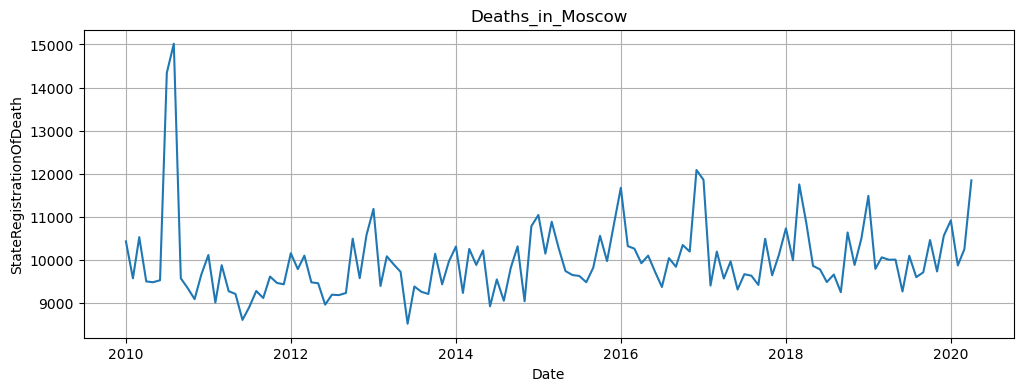

In [45]:

# Построим график временного ряда
plt.figure(figsize=(12, 4))
plt.plot(sub_df['Date'], sub_df['StateRegistrationOfDeath'])
plt.title('Deaths_in_Moscow')
plt.xlabel('Date')
plt.ylabel('StateRegistrationOfDeath')
plt.grid(True)
plt.show()

In [46]:

from statsmodels.tsa.stattools import adfuller

print('Результат теста:')
df_result = adfuller(sub_df['StateRegistrationOfDeath'])
df_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
for result_value, label in zip(df_result, df_labels):
    print(label + ' : ' + str(result_value))

if df_result[1] <= 0.05:
    print("Сильные доказательства против нулевой гипотезы, ряд является стационарным.")
else:
    print("Слабые доказательства против нулевой гипотезы, ряд не является стационарным.")

Результат теста:
ADF Test Statistic : -2.0158484432250403
p-value : 0.27966763282082086
#Lags Used : 13
Number of Observations Used : 110
Слабые доказательства против нулевой гипотезы, ряд не является стационарным.


In [48]:
sub_df.loc[sub_df['StateRegistrationOfDeath'] > 12086, 'StateRegistrationOfDeath'] = np.nan

In [49]:
sub_df[sub_df['StateRegistrationOfDeath'] > 12086]

,Date,StateRegistrationOfDeath


In [50]:
sub_df.interpolate(inplace=True)
#sub_df[sub_df['Date']=='2010-07-01'].astype(int)

#sub_df.loc[sub_df['Date'] == '2010-07-01', 'StateRegistrationOfDeath'].astype(int).astype(float).round(2)
sub_df['StateRegistrationOfDeath'] = sub_df['StateRegistrationOfDeath'].astype(int).astype(float).round(2)
#sub_df.loc[sub_df['Date'] == '2010-07-01'].astype(int).astype(float).round(2)

In [51]:
sub_df.loc[sub_df['Date'] == '2010-07-01']

,Date,StateRegistrationOfDeath
6,2010-07-01,9543.0


In [52]:
#sub_df['Date'] = pd.to_datetime(sub_df['Date'])
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      124 non-null    datetime64[ns]
 1   StateRegistrationOfDeath  124 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


In [53]:
# выставить Data индексом, чтоб модель работала
sub_df.set_index('Date', inplace=True)

Модель ARIMA, Сезонная модель ARIMA или SARIMA (Seasonal Autoregressive Integrated Moving Average) — это расширение модели ARIMA, добавляющее в нее понятие сезонности. 
Сезонная модель ARIMA обычно обозначается как SARIMA (p, d, q) (P, D, Q) m, где p, d, q — это несезонные параметры, а P, D, Q — сезонные:
p, d, q работают также, как и в ARIMA.
P — порядок сезонной авторегрессии, и он основан на количестве предыдущих сезонов, которые влияют на текущий сезон.
D — порядок сезонной интеграции, то есть сколько раз нужно продифференцировать данные, чтобы убрать сезонные тренды.
Q — порядок сезонного скользящего среднего, то есть как много предыдущих сезонных ошибок прогноза используется в модели.
m — это длина сезонного периода. Например, если данные имеют годовую сезонность и данные собираются ежемесячно, то m будет равно 12. 

In [23]:
#try:
#    # Assuming sub_df is now cleaned and ready for model fitting
#    sarima_model = SARIMAX(sub_df,
#                           order=(1, 1, 1),
#                           seasonal_order=(1, 1, 1, 12),
#                           enforce_stationarity=False,
#                           enforce_invertibility=False)
#
#    model_results = sarima_model.fit(disp=False)
#    print(model_results.summary())
#except Exception as e:
#    print(f"Error fitting model: {e}")

                                     SARIMAX Results                                      
Dep. Variable:           StateRegistrationOfDeath   No. Observations:                  124
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -733.274
Date:                            Fri, 24 May 2024   AIC                           1476.548
Time:                                    12:17:22   BIC                           1489.422
Sample:                                01-01-2010   HQIC                          1481.754
                                     - 04-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2312      0.138      1.681      0.093      -0.038       0.501
ma.L1         -0.9357      0.056   

In [55]:
def search_optimal_sarima(sub_df, seasonal_cycle):
    # Define the ranges for p, d, q, and m (seasonal part of the model)
    order_vals = diff_vals = ma_vals = range(0, 2)
    
    # Generate all possible combinations of p, d, q values
    pdq_combinations = list(itertools.product(order_vals, diff_vals, ma_vals))
    
    # Add the seasonal parameter to each combination
    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]
    
    # Initialize variables to store the best model parameters and its AIC
    smallest_aic = float("inf")
    optimal_order_param = optimal_seasonal_param = None
    
    # Iterate over all possible model configurations
    for order_param in pdq_combinations:
        for seasonal_param in seasonal_combinations:
            try:
                # Attempt to fit the SARIMAX model
                sarima_model = SARIMAX(sub_df,
                                       order=order_param,
                                       seasonal_order=seasonal_param,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)

                model_results = sarima_model.fit(disp=False)  # Set disp=False to suppress unnecessary output
                
                # Update the best model parameters and AIC if necessary
                if model_results.aic < smallest_aic:
                    smallest_aic = model_results.aic
                    optimal_order_param = order_param
                    optimal_seasonal_param = seasonal_param
            except Exception as e:
                # Print out errors for debugging purposes
                print(f"Error fitting model with params {order_param} and seasonal param {seasonal_param}: {e}")
                continue

    # Print the results
    print('SARIMA{}x{} - AIC:{}'.format(optimal_order_param, optimal_seasonal_param, smallest_aic))


seasonal_cycle_length = 12
search_optimal_sarima(sub_df, seasonal_cycle_length)

SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1476.0835744370265


In [310]:
#Построение и оценка модели SARIMAX

In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(sub_df, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))


In [57]:
# обучаем модель
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89235D+00    |proj g|=  3.31945D-02

At iterate    5    f=  6.87936D+00    |proj g|=  3.85957D-03


 This problem is unconstrained.



At iterate   10    f=  6.87751D+00    |proj g|=  1.45877D-03

At iterate   15    f=  6.87655D+00    |proj g|=  7.38965D-03

At iterate   20    f=  6.80168D+00    |proj g|=  2.90107D-02

At iterate   25    f=  6.79934D+00    |proj g|=  2.32977D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     31      1     0     0   2.213D-06   6.799D+00
  F =   6.7993395126535088     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [58]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:           StateRegistrationOfDeath   No. Observations:                  124
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -843.118
Date:                            Mon, 02 Sep 2024   AIC                           1694.236
Time:                                    13:25:01   BIC                           1705.074
Sample:                                01-01-2010   HQIC                          1698.633
                                     - 04-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3914      0.099      3.959      0.000       0.198       0.585
ma.L1         -0.9999     10.022   

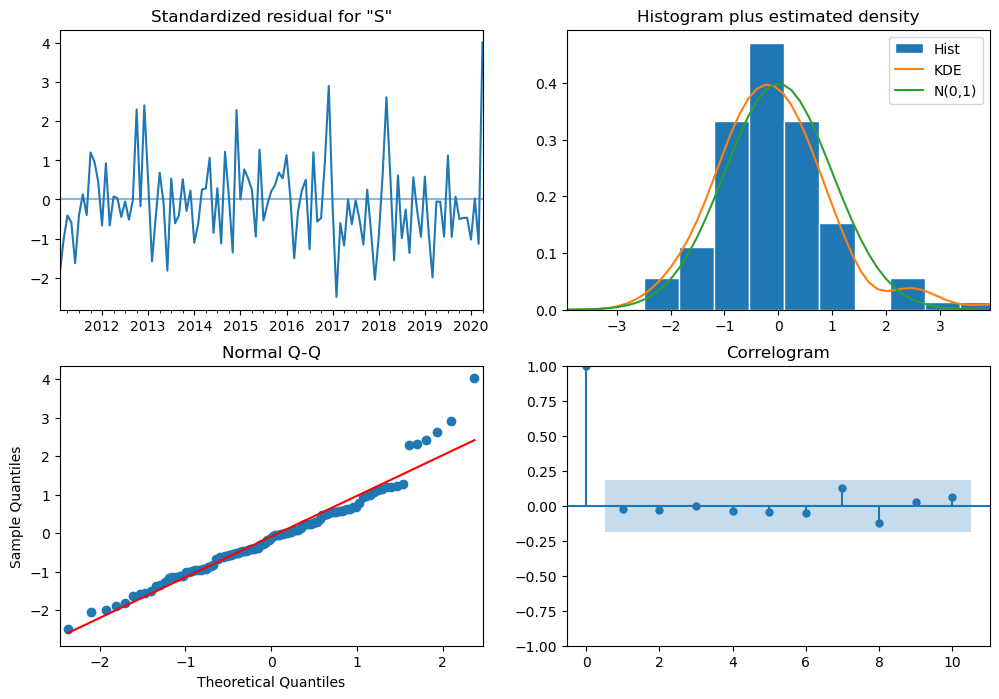

In [59]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

Статический прогноз

In [60]:
st_pred = results.get_prediction(start=pd.to_datetime('2010-06-01'), dynamic=False) 
forecast_values = st_pred.predicted_mean

In [61]:
actual_values = sub_df['2010-01-01':]['StateRegistrationOfDeath']
forecast_mse = ((forecast_values - actual_values) ** 2).mean()
print('Среднеквадратичная ошибка прогноза составляет {}'.format(round(forecast_mse, 2)))

Среднеквадратичная ошибка прогноза составляет 411023.78


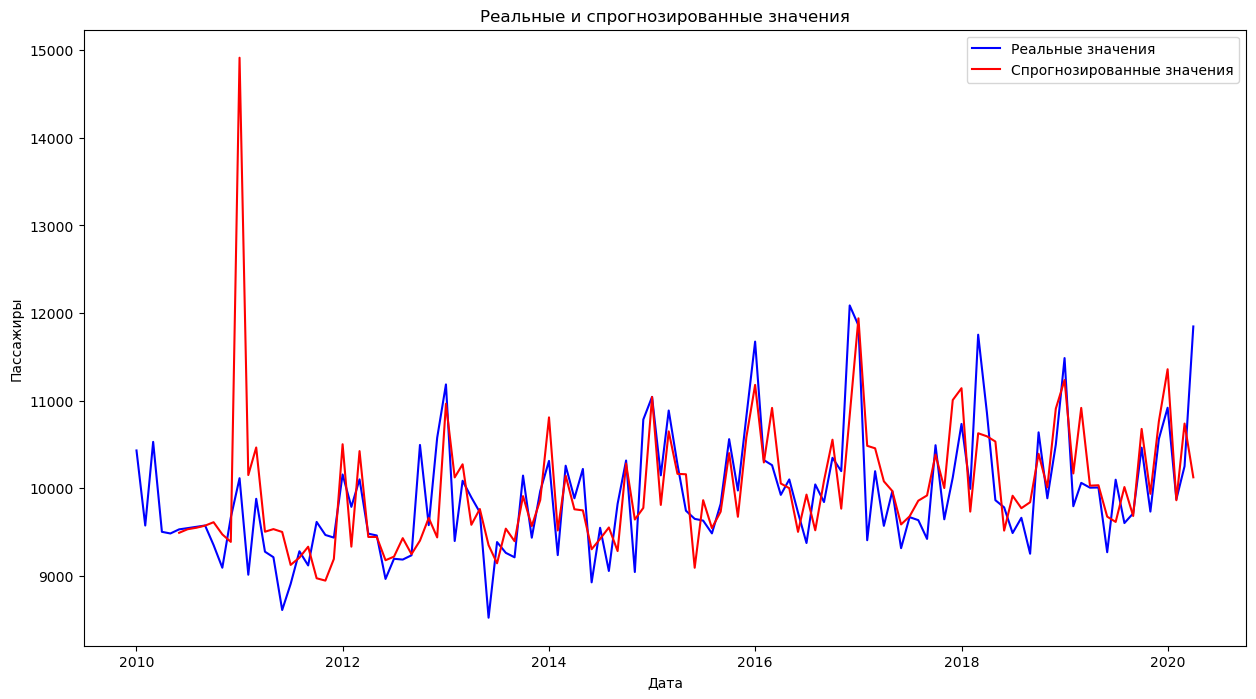

In [62]:
plt.figure(figsize=(15,8))

plt.plot(actual_values.index, actual_values, label='Реальные значения', color='blue')

plt.plot(forecast_values.index, forecast_values, label='Спрогнозированные значения', color='red')

plt.title('Реальные и cпрогнозированные значения')
plt.xlabel('Дата')
plt.ylabel('Пассажиры')
plt.legend()
plt.show()

Динамический прогноз

In [63]:
dyn_pred = results.get_prediction(start=pd.to_datetime('2011-06-01'), dynamic=True) 
dynamic_forecast_values = dyn_pred.predicted_mean

среднеквадратичная ошибку для динамического прогноза

In [64]:
mse_dynamic_forecast = ((dynamic_forecast_values - actual_values) ** 2).mean()
print('Среднеквадратичная ошибка динамического прогноза составляет {}'.format(round(mse_dynamic_forecast, 2)))

Среднеквадратичная ошибка динамического прогноза составляет 542673.07


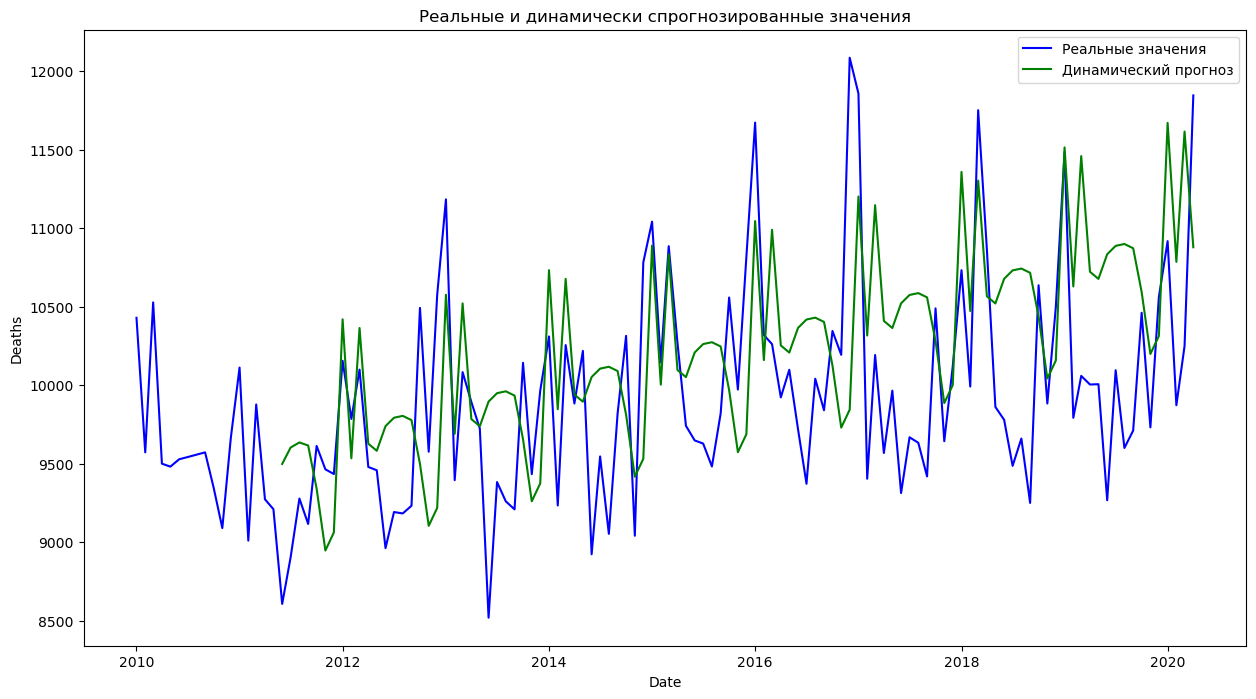

In [65]:
plt.figure(figsize=(15,8))

plt.plot(actual_values.index, actual_values, label='Реальные значения', color='blue')

plt.plot(dynamic_forecast_values.index, dynamic_forecast_values, label='Динамический прогноз', color='green')

plt.title('Реальные и динамически спрогнозированные значения')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()

plt.show()

Создание и визуализация прогноза


In [66]:
pred_future = results.get_forecast(steps=12)

In [67]:
print(pred_future.predicted_mean)

2020-05-01    10801.451679
2020-06-01     9929.548348
2020-07-01    10065.555696
2020-08-01     9942.405797
2020-09-01     9883.276502
2020-10-01    10743.963251
2020-11-01    10051.702888
2020-12-01    10897.363214
2021-01-01    11435.764165
2021-02-01    10139.730730
2021-03-01    10780.587974
2021-04-01    10879.529480
Freq: MS, Name: predicted_mean, dtype: float64


In [68]:
print(f'Средние прогнозируемые значения:\n\n{pred_future.predicted_mean}')
print(f'\nДоверительные интервалы:\n\n{pred_future.conf_int()}')

Средние прогнозируемые значения:

2020-05-01    10801.451679
2020-06-01     9929.548348
2020-07-01    10065.555696
2020-08-01     9942.405797
2020-09-01     9883.276502
2020-10-01    10743.963251
2020-11-01    10051.702888
2020-12-01    10897.363214
2021-01-01    11435.764165
2021-02-01    10139.730730
2021-03-01    10780.587974
2021-04-01    10879.529480
Freq: MS, Name: predicted_mean, dtype: float64

Доверительные интервалы:

            lower StateRegistrationOfDeath  upper StateRegistrationOfDeath
2020-05-01                     9960.908024                    11641.995334
2020-06-01                     9022.134274                    10836.962422
2020-07-01                     9146.485103                    10984.626289
2020-08-01                     9020.838842                    10863.972752
2020-09-01                     8961.033310                    10805.519695
2020-10-01                     9821.476777                    11666.449724
2020-11-01                     9129.073903 

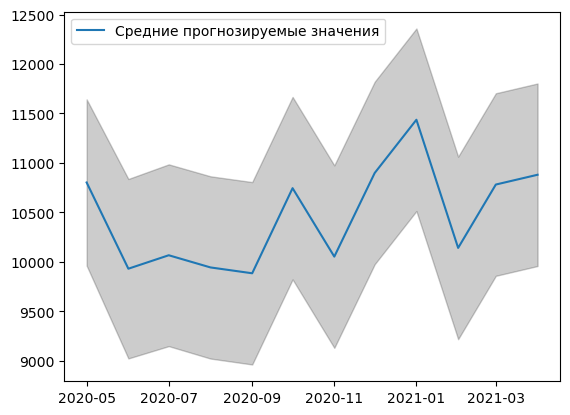

In [69]:
fig = plt.figure()
plt.plot(pred_future.predicted_mean, label='Средние прогнозируемые значения')
plt.fill_between(pred_future.conf_int().index,
                 pred_future.conf_int().iloc[:, 0],
                 pred_future.conf_int().iloc[:, 1], color='k', alpha=.2)
plt.legend()  
plt.show()

In [70]:
predicted_series = pred_future.predicted_mean

In [67]:
#print(predicted_series)

In [71]:
# series =>в dataframe
predicted_df = predicted_series.reset_index(name='predicted_mean').rename(columns={'index': 'Datetime'})

In [72]:
conf_int = pred_future.conf_int()
conf_int_no_index = conf_int.reset_index().rename(columns={'index': 'Datetime'})

In [73]:
print(conf_int_no_index)

     Datetime  lower StateRegistrationOfDeath  upper StateRegistrationOfDeath
0  2020-05-01                     9960.908024                    11641.995334
1  2020-06-01                     9022.134274                    10836.962422
2  2020-07-01                     9146.485103                    10984.626289
3  2020-08-01                     9020.838842                    10863.972752
4  2020-09-01                     8961.033310                    10805.519695
5  2020-10-01                     9821.476777                    11666.449724
6  2020-11-01                     9129.073903                    10974.331872
7  2020-12-01                     9974.577262                    11820.149166
8  2021-01-01                    10512.750938                    12358.777393
9  2021-02-01                     9216.710520                    11062.750940
10 2021-03-01                     9857.564388                    11703.611560
11 2021-04-01                     9956.503942                   

In [74]:
result_merged = pd.merge(predicted_df, conf_int_no_index, on='Datetime')

In [75]:
result_merged

,Datetime,predicted_mean,lower StateRegistrationOfDeath,upper StateRegistrationOfDeath
0,2020-05-01,10801.451679,9960.908024,11641.995334
1,2020-06-01,9929.548348,9022.134274,10836.962422
2,2020-07-01,10065.555696,9146.485103,10984.626289
3,2020-08-01,9942.405797,9020.838842,10863.972752
4,2020-09-01,9883.276502,8961.033310,10805.519695
5,2020-10-01,10743.963251,9821.476777,11666.449724
6,2020-11-01,10051.702888,9129.073903,10974.331872
7,2020-12-01,10897.363214,9974.577262,11820.149166
8,2021-01-01,11435.764165,10512.750938,12358.777393
9,2021-02-01,10139.730730,9216.710520,11062.750940


In [76]:
result = result_merged.to_json(orient="table")
print(result)

{"schema":{"fields":[{"name":"index","type":"integer"},{"name":"Datetime","type":"datetime"},{"name":"predicted_mean","type":"number"},{"name":"lower StateRegistrationOfDeath","type":"number"},{"name":"upper StateRegistrationOfDeath","type":"number"}],"primaryKey":["index"],"pandas_version":"1.4.0"},"data":[{"index":0,"Datetime":"2020-05-01T00:00:00.000","predicted_mean":10801.4516787746,"lower StateRegistrationOfDeath":9960.9080238032,"upper StateRegistrationOfDeath":11641.9953337459},{"index":1,"Datetime":"2020-06-01T00:00:00.000","predicted_mean":9929.5483477265,"lower StateRegistrationOfDeath":9022.1342735198,"upper StateRegistrationOfDeath":10836.9624219331},{"index":2,"Datetime":"2020-07-01T00:00:00.000","predicted_mean":10065.5556959892,"lower StateRegistrationOfDeath":9146.4851028302,"upper StateRegistrationOfDeath":10984.6262891482},{"index":3,"Datetime":"2020-08-01T00:00:00.000","predicted_mean":9942.4057972481,"lower StateRegistrationOfDeath":9020.8388421822,"upper StateRegi

In [288]:
###################################################


https://mlpills.dev/time-series/how-to-train-a-sarima-model-step-by-step/

Kwiatkowski–Phillips–Schmidt–Shin (KPSS)

In [292]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test
result = kpss(sub_df)

# Extract and print the test statistic and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [13]:
np.asanyarray(sub_df)

array([[10430],
       [ 9573],
       [10528],
       [ 9501],
       [ 9482],
       [ 9529],
       [14340],
       [15016],
       [ 9573],
       [ 9350],
       [ 9091],
       [ 9664],
       [10113],
       [ 9011],
       [ 9878],
       [ 9274],
       [ 9211],
       [ 8608],
       [ 8906],
       [ 9279],
       [ 9117],
       [ 9614],
       [ 9465],
       [ 9435],
       [10156],
       [ 9786],
       [10100],
       [ 9480],
       [ 9459],
       [ 8963],
       [ 9193],
       [ 9184],
       [ 9233],
       [10493],
       [ 9577],
       [10576],
       [11184],
       [ 9396],
       [10084],
       [ 9894],
       [ 9724],
       [ 8520],
       [ 9384],
       [ 9261],
       [ 9210],
       [10143],
       [ 9434],
       [ 9967],
       [10311],
       [ 9235],
       [10256],
       [ 9884],
       [10219],
       [ 8924],
       [ 9547],
       [ 9054],
       [ 9821],
       [10315],
       [ 9042],
       [10783],
       [11042],
       [10146],
       [

In [ ]:
# попробовать год, финансы - смертность

In [ ]:
print(result)